In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers

Iteration 1, RMSE: 68.21617193425487
Iteration 2, RMSE: 65.2735363219193
Iteration 3, RMSE: 363.1453609290938
Iteration 4, RMSE: 342.8419999622811
Iteration 5, RMSE: 389.6433345713637
Iteration 6, RMSE: 243.55311547284816
Iteration 7, RMSE: 245.30380335111766
Iteration 8, RMSE: 235.70891572682632
Iteration 9, RMSE: 202.13924590466644
Iteration 10, RMSE: 255.00640260748102
Iteration 11, RMSE: 249.166312564328
Iteration 12, RMSE: 175.67083396771488
Iteration 13, RMSE: 183.55068619478047
Iteration 14, RMSE: 184.1709058605794
Iteration 15, RMSE: 153.3351073443185
Iteration 16, RMSE: 150.86759134148494
Iteration 17, RMSE: 320.0377292476933
Iteration 18, RMSE: 168.92882513660174
Iteration 19, RMSE: 168.8729705030688
Convergence reached at iteration 19.


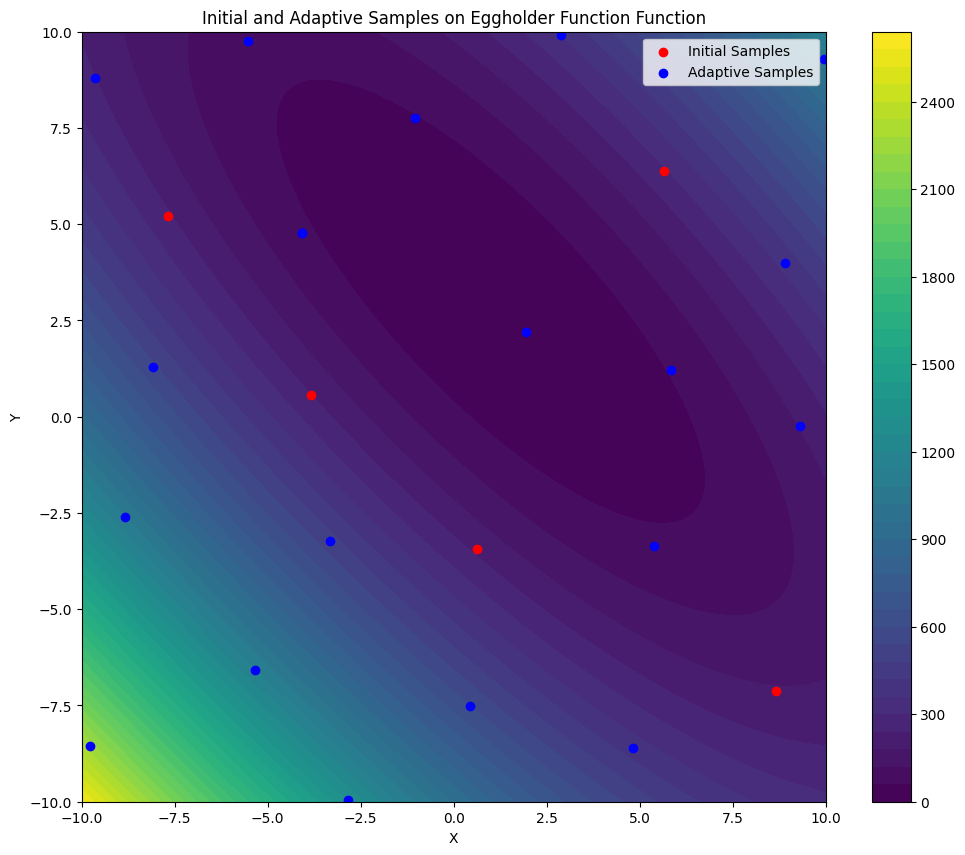

           X         Y
0  -3.824303  0.558769
1   8.652213 -7.127101
2   5.656885  6.378262
3   0.627197 -3.435917
4  -7.675606  5.225132
5   4.826744 -8.601827
6   9.311005 -0.242061
7  -9.771866 -8.549959
8  -8.842091 -2.611008
9  -2.840587 -9.963939
10 -1.039987  7.758398
11 -5.529631  9.750847
12 -8.092431  1.285662
13  9.955183  9.301648
14 -5.350150 -6.570014
15  0.437666 -7.525876
16  2.895753  9.910143
17  1.936022  2.204902
18  5.394830 -3.350678
19 -3.328151 -3.235004
20  5.838719  1.218469
21 -9.632252  8.794871
22  8.916594  4.001910
23 -4.079531  4.776339
24 -4.079531  4.776339


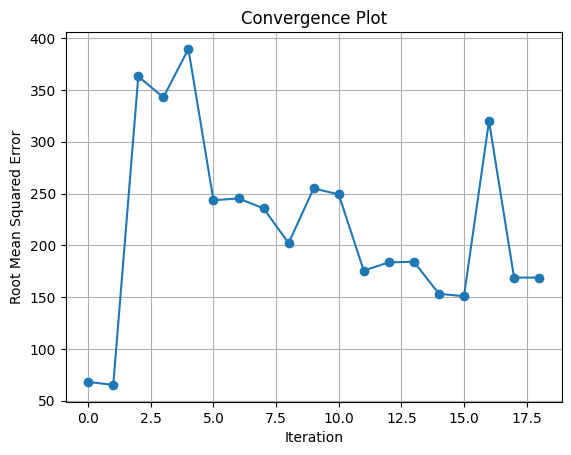

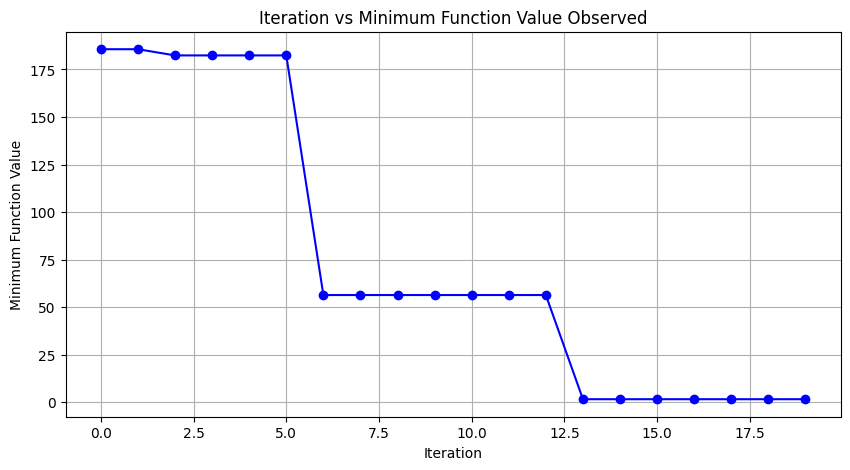

Best observed function value after active learning: 1.5877577048858451


In [3]:
range_param = ex_func.function_ranges["Booth"]
function_param = ex_func.booth

# Generate a mesh for the background function
input, output = samplers.Sampler.generate_mesh(range_param, num_points=100, function= function_param)

# Generate initial samples
sampler = samplers.LatinHypercubeSampling(function_param)
initial_points = sampler.sample(num_samples=5, ranges = range_param)
initial_values = np.array([function_param(i) for i in initial_points])

# Train the initial model using random forests
rf_model = models.RandomForestModel(n_estimators=20, random_state=1729)
rf_model.train_model(initial_points, initial_values)
trained_rf_model = rf_model.get_model()

# Perform active learning
active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
min_function_values, improvement, new_points_all = active_learning.run_active_learning(200, range_param, 3)

# Plot the results
sampling_vis = gen_def.SamplingVisualization(initial_points, np.array(new_points_all), min_function_values, improvement)
sampling_vis.plot_visuals(input, output, "Booth Function")
sampling_vis.plot_results()

In [5]:
functions = {
    "Ackley": ex_func.ackley,
    "Bukin": ex_func.bukin,
    "Cross-in-Tray": ex_func.cross_in_tray,
    "Drop-Wave": ex_func.drop_wave,
    "Eggholder": ex_func.eggholder,
    "Gramacy & Lee": ex_func.gramacy_lee,
    "Griewank": ex_func.griewank,
    "Holder Table": ex_func.holder_table,
    "Rastrigin": ex_func.rastrigin,
    "Schaffer Function N. 2": ex_func.schaffer2,
    "Schaffer Function N. 4": ex_func.schaffer4,
    "Schwefel": ex_func.schwefel,
    "Shubert": ex_func.shubert,

    
    "Booth": ex_func.booth,
    "Matyas": ex_func.matyas,
    "McCormick": ex_func.mccormick,
    "Zakharov": ex_func.zakharov,
    "Three-Hump Camel": ex_func.three_hump_camel,
    "Six-Hump Camel": ex_func.six_hump_camel,
    "Dixon-Price": ex_func.dixon_price,
    
    "De Jong Function N. 5": ex_func.de_jong5,
    "Easom": ex_func.easom,
    "Beale": ex_func.beale,
    "Branin": ex_func.branin,
    "Colville": ex_func.colville
}

for name, function_param in functions.items():
    print(f"Optimizing function: {name}")

    # Generate a mesh for the background function
    range_param = ex_func.function_ranges[name]
    X, Y, Z = samplers.Sampler.generate_mesh(range_param, num_points=100, function=function_param)

    # Generate initial samples
    sampler = samplers.LatinHypercubeSampling(function_param)
    initial_points = sampler.sample(num_samples=5, ranges=range_param)
    initial_values = np.array([function_param([x, y]) for x, y in initial_points])

    # Train the initial model using random forests
    rf_model = models.RandomForestModel(n_estimators=20, random_state=1729)
    rf_model.train_model(initial_points, initial_values)
    trained_rf_model = rf_model.get_model()

    # Perform active learning
    active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
    min_function_values, improvement, new_points_all = active_learning.run_active_learning(200, range_param, 3)

    # Plot the results
    sampling_vis = gen_def.SamplingVisualization2D(initial_points, np.array(new_points_all), min_function_values,
                                                  improvement)
    sampling_vis.plot_results(X, Y, Z, name)

Optimizing function: Ackley


ValueError: not enough values to unpack (expected 3, got 2)